In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from warnings import filterwarnings
filterwarnings("ignore")


### Q1) Perform Exploratory Data Analysis (EDA)
a) Visualize the first 10 rows of the data set
<br>b) Check the shape of the data set
<br>c) Show distribution of the numerical columns
<br>d) Generate the correlation matrix
<br>e) Visualize whether any attributes are related to the target variable

In [2]:
data = pd.read_csv("wine.csv")
data.head(10)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   
5            7.4              0.66         0.00             1.8      0.075   
6            7.9              0.60         0.06             1.6      0.069   
7            7.3              0.65         0.00             1.2      0.065   
8            7.8              0.58         0.02             2.0      0.073   
9            7.5              0.50         0.36             6.1      0.071   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   
5                 13.0                  40.0   0.9978  3.51       0.56   
6                 15.0                  59.0   0.9964  3.30       0.46   
7                 15.0                  21.0   0.9946  3.39       0.47   
8                  9.0                  18.0   0.9968  3.36       0.57   
9                 17.0                 102.0   0.9978  3.35       0.80   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5  
5      9.4        5  
6      9.4        5  
7     10.0        7  
8      9.5        7  
9     10.5        5

In [3]:
print(data.shape)

(1599, 12)


In [4]:
data.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

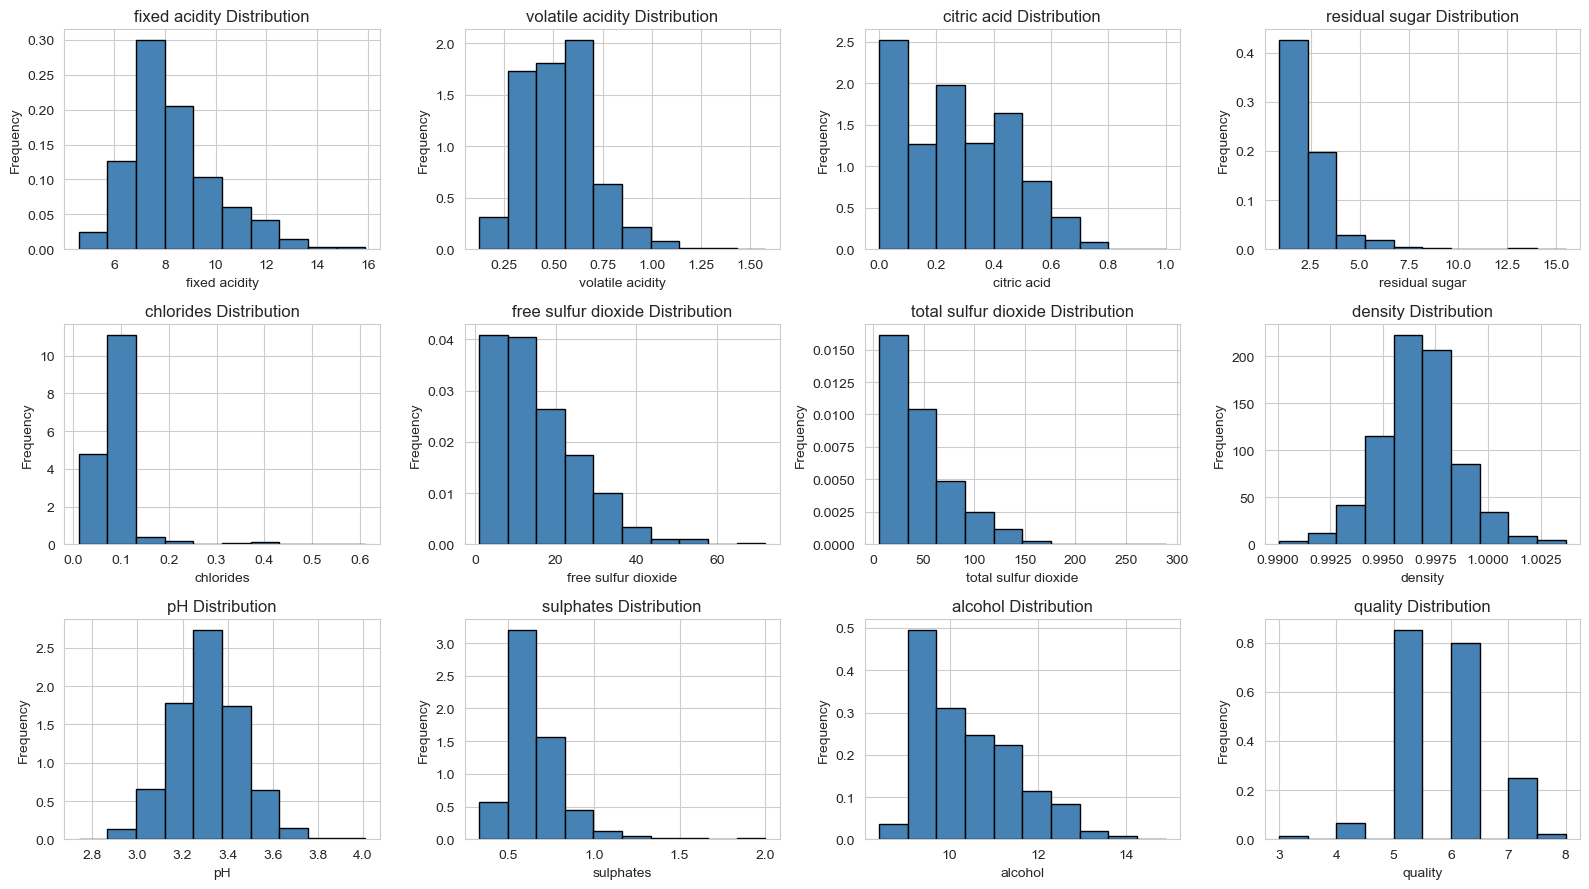

In [5]:
fig, axs = plt.subplots(3, 4, figsize=(16, 9))
for i, col in enumerate(data.columns):
    ax = axs[i//4, i%4]
    ax.hist(data[col], density=True, color='steelblue', ec='black')
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')
    ax.set_title(f'{col} Distribution')
fig.tight_layout()
plt.show()

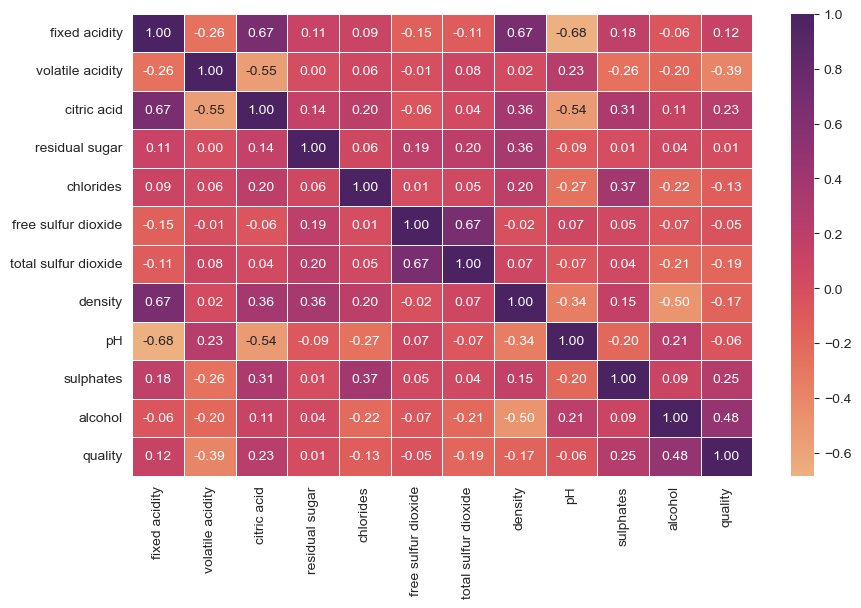

In [6]:
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(), annot=True, cmap="flare", linewidths=0.5, fmt='.2f')
plt.show()

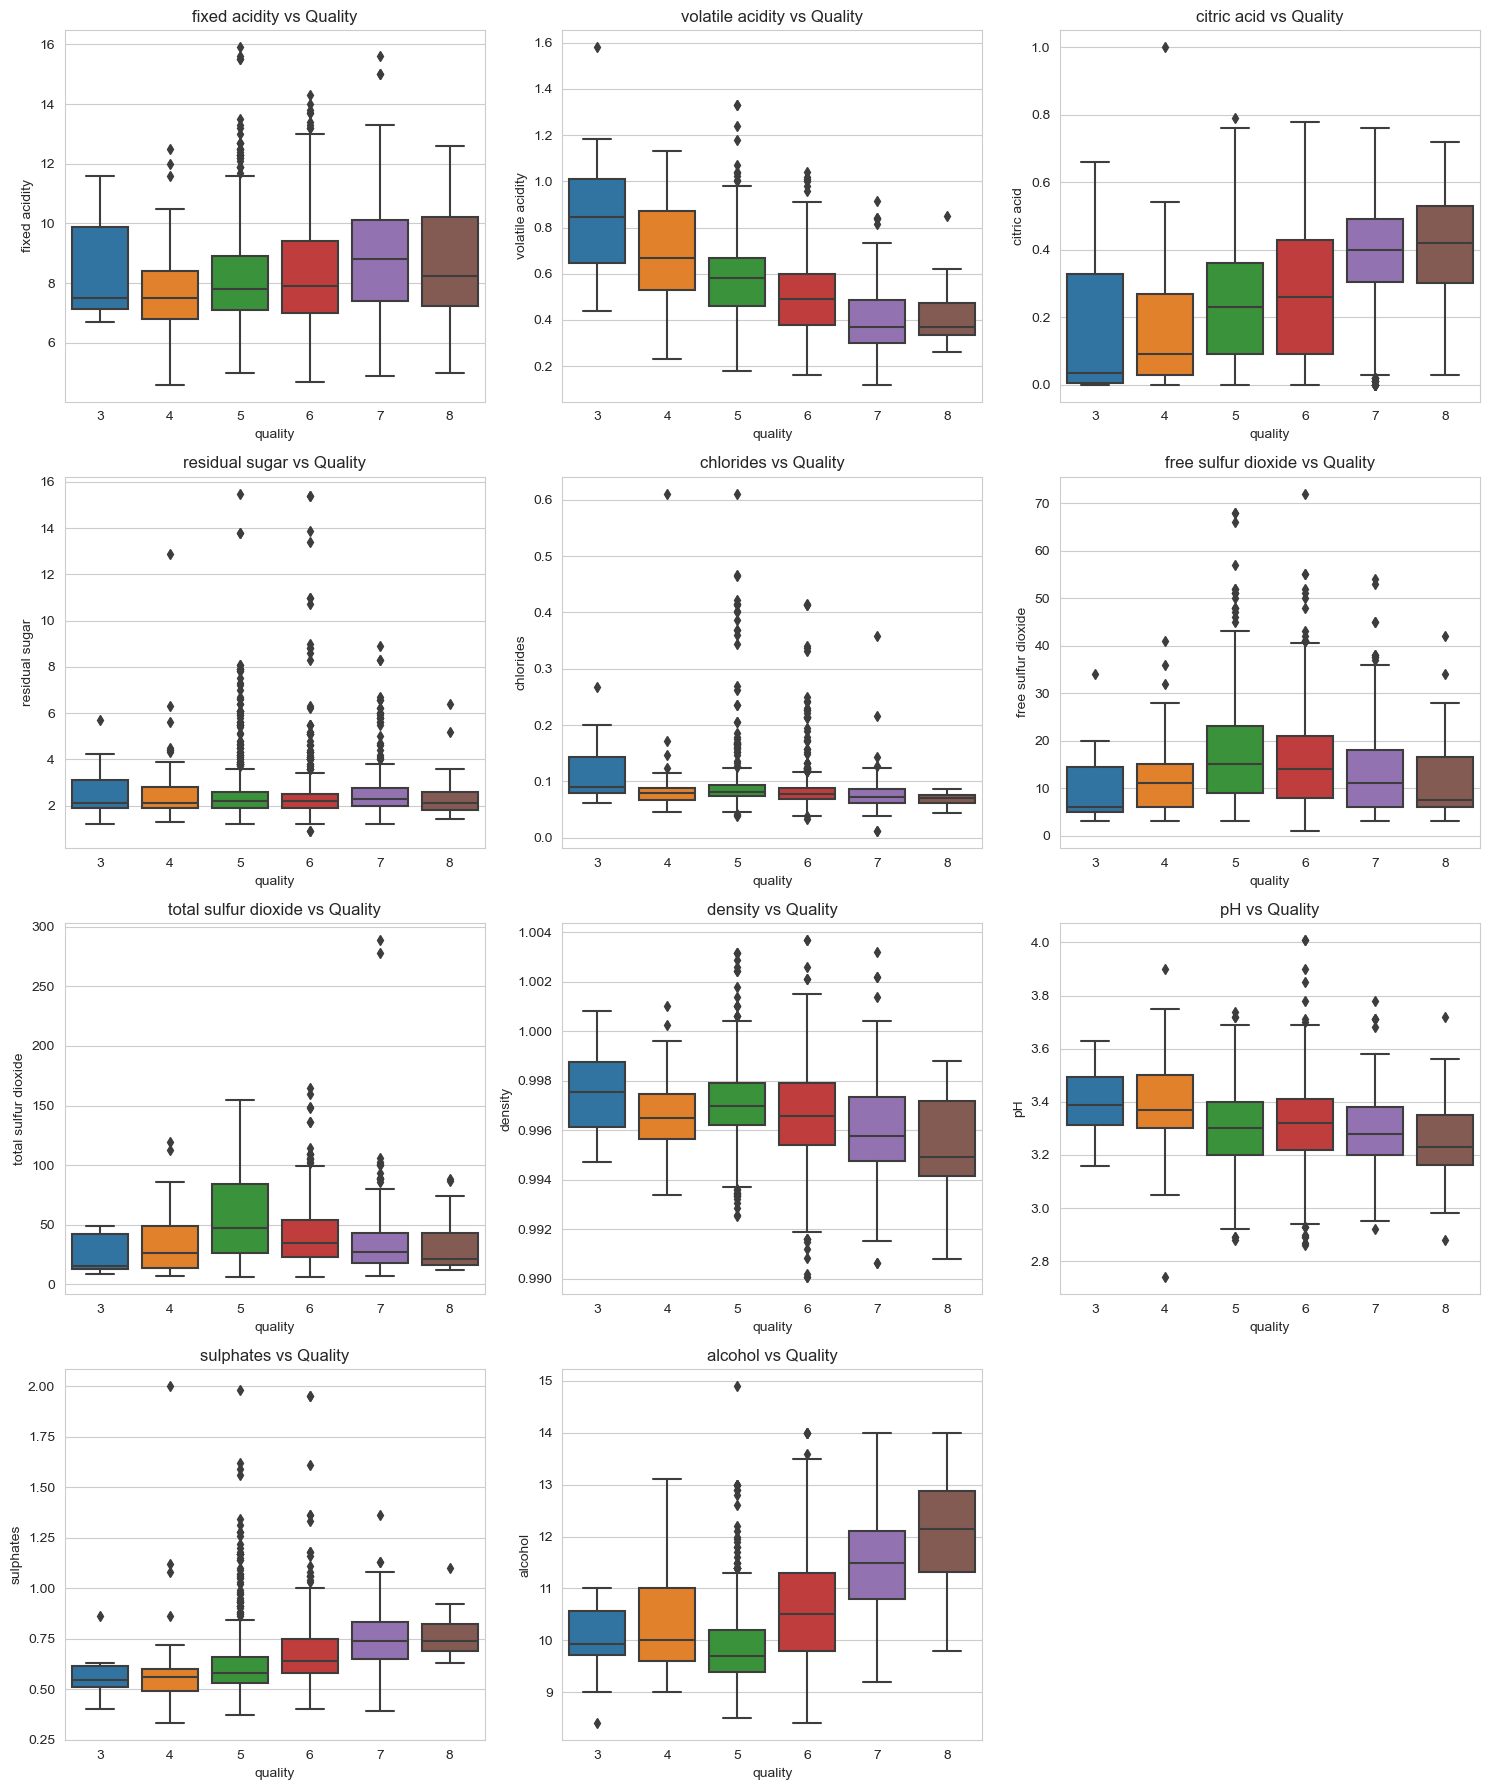

In [7]:
cols = data.drop('quality', axis=1)
fig, axs = plt.subplots(4,3, figsize=(15, 18))
for i, col in enumerate(cols):
    ax = axs[i//3, i%3]
    sns.boxplot(x='quality', y=col, data=data, ax=ax)
    ax.set_title(f'{col} vs Quality')
fig.delaxes(axs[3,2])
fig.tight_layout()
plt.show()

### Q2) Generate pair-plot for the data

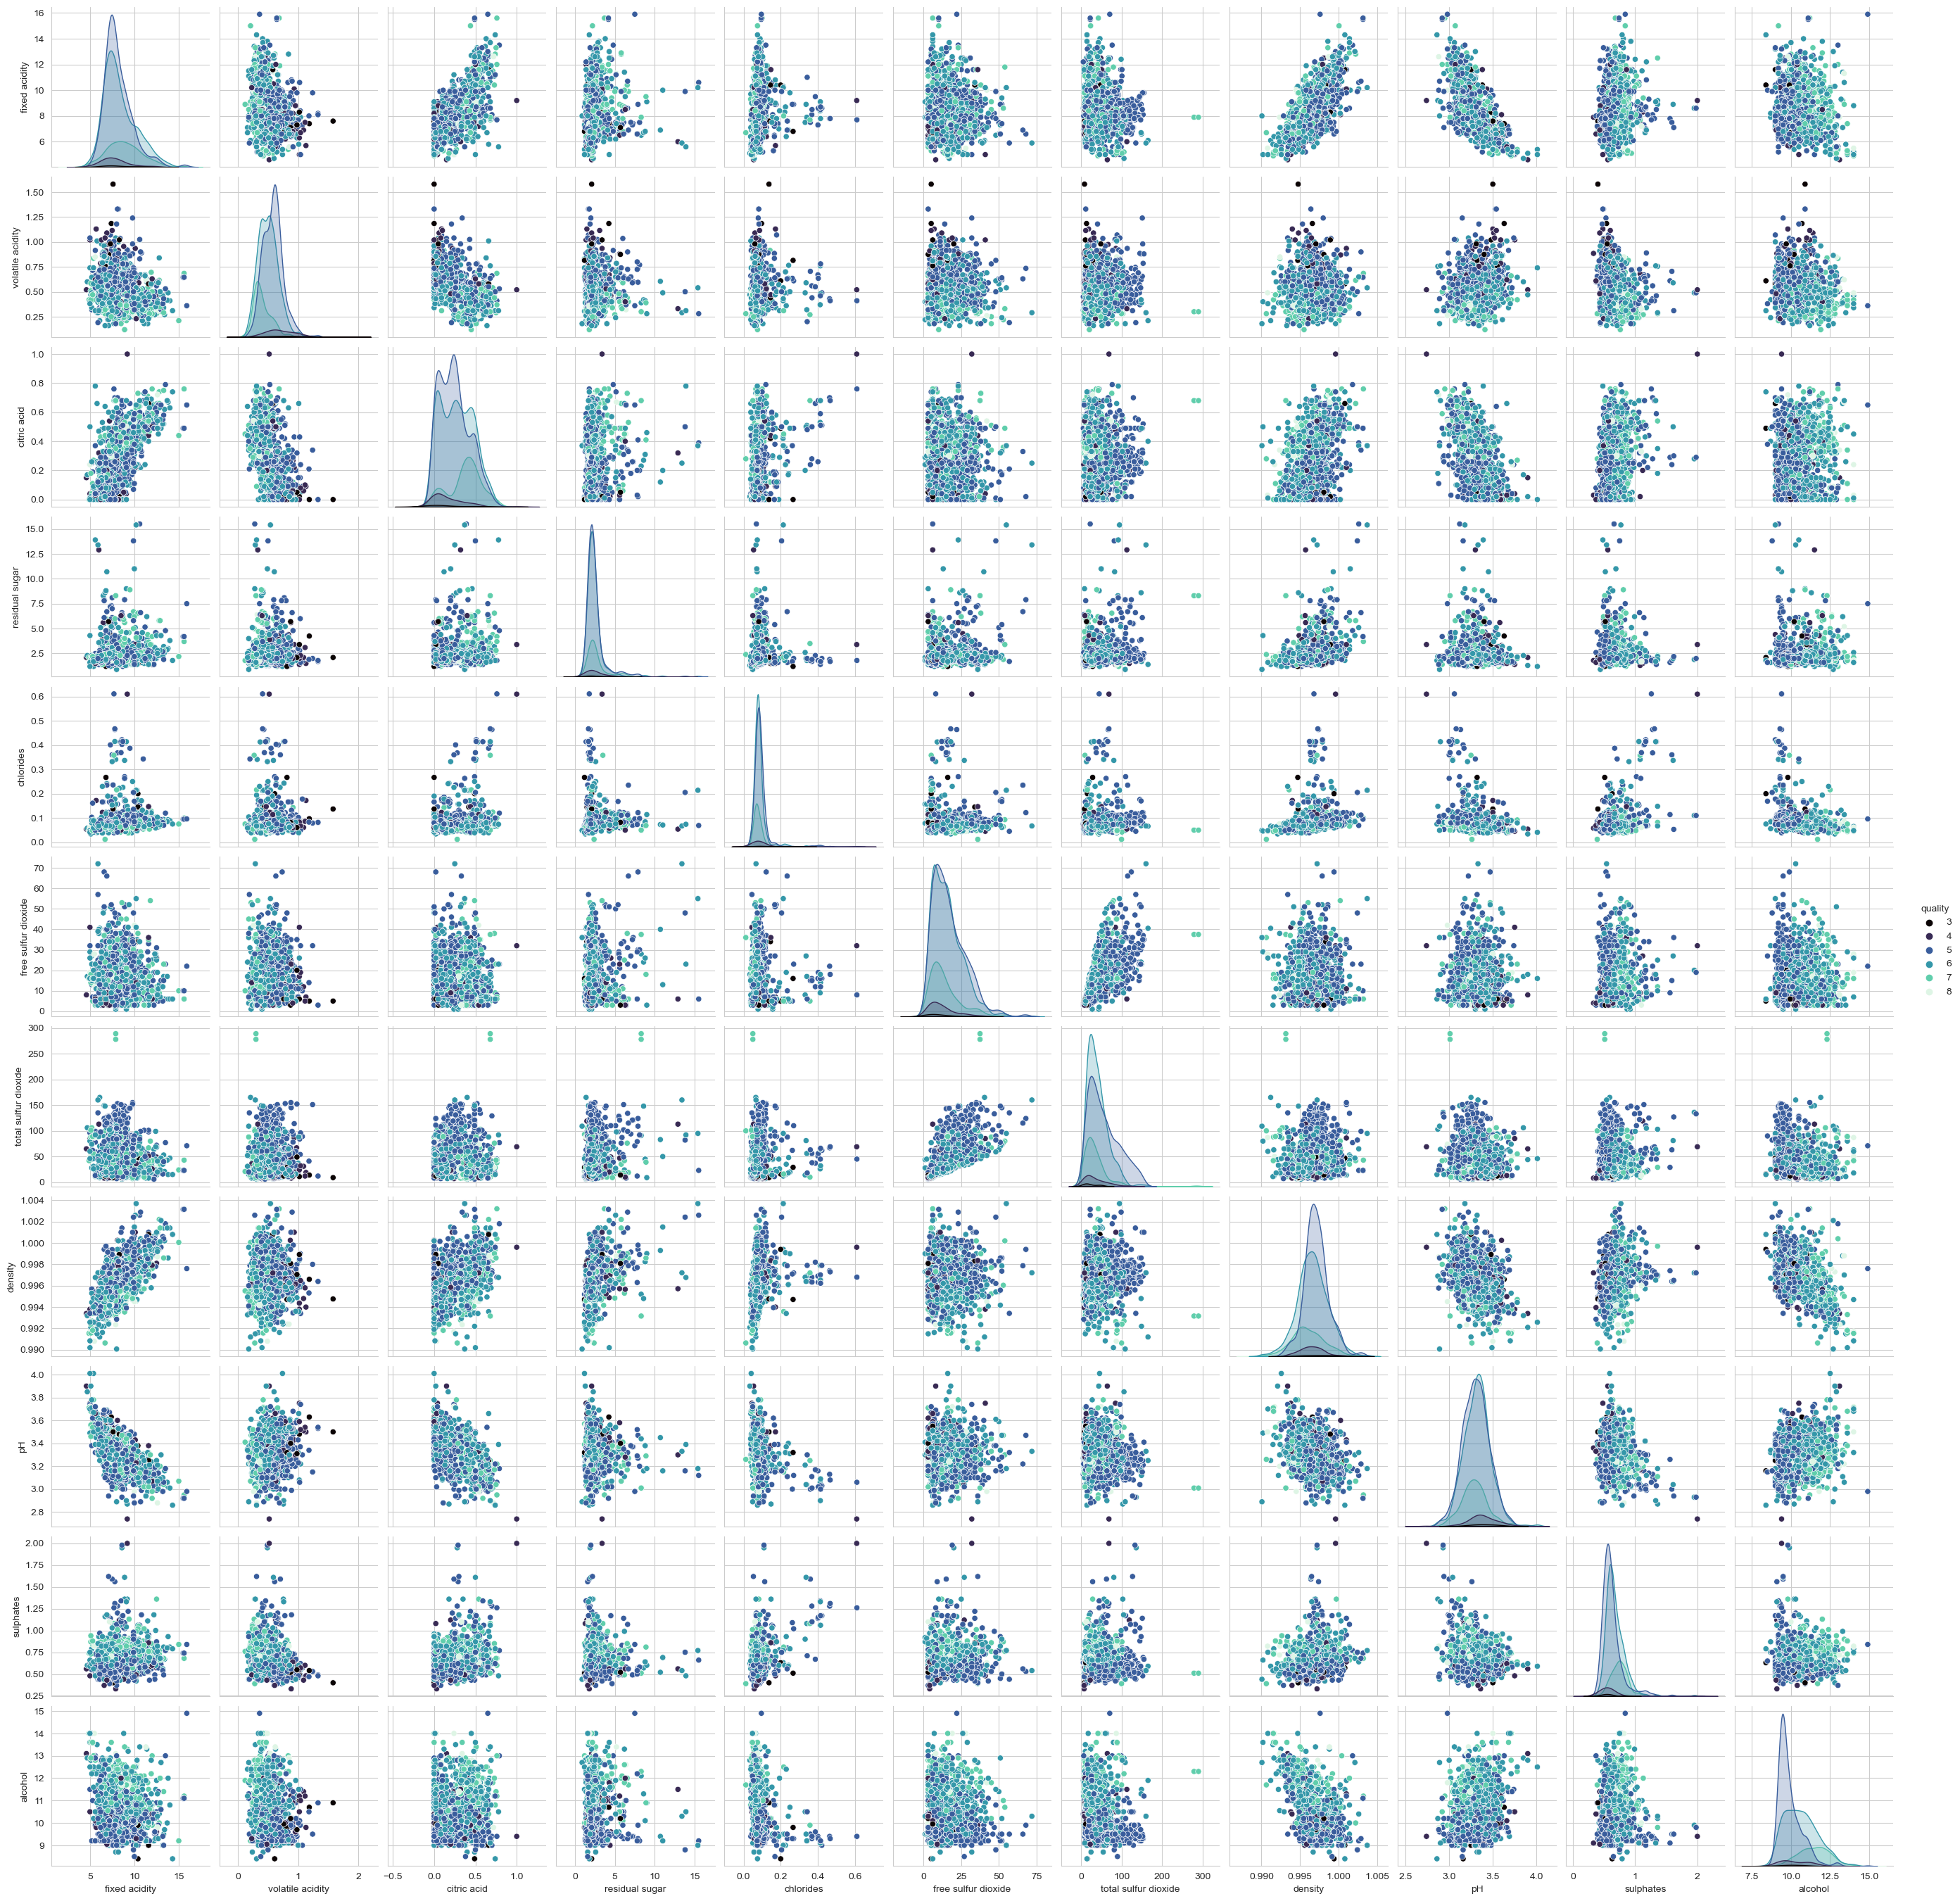

In [8]:
sns.pairplot(data, hue='quality', palette='mako')
plt.show()

### Q3) Generate a count plot for the target variable (quality)


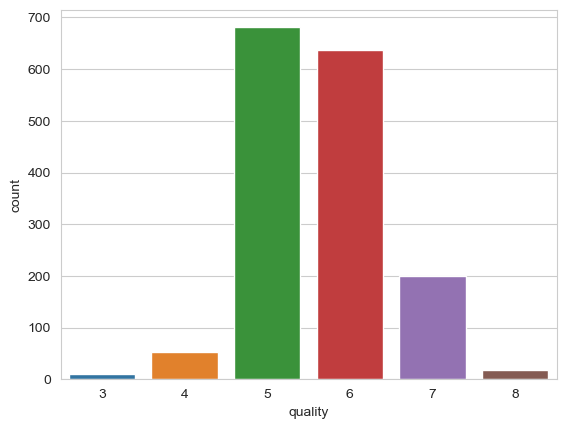

In [9]:
sns.countplot(data, x="quality")
plt.show()

### Q4) Converting the target variable 'Quality' to categorical, such that 
<br>Wines having the “Quality” value > 6.5  are assigned value 1, and 
<br> Wines having the “Quality” value < 6.5, are assigned value 0
<br> Where 0: Ordinary Quality of wine and 1: High quality of wine


In [10]:
data['quality'] = data.quality.apply(lambda x : 0 if x<=6.5 else 1)

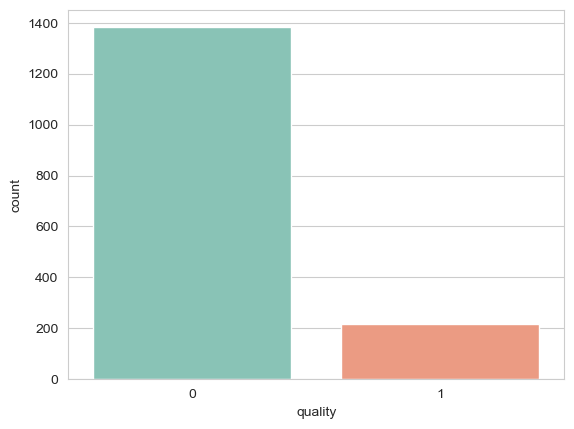

In [11]:
sns.countplot(data, x='quality', palette=['#7fcdbb', '#fc9272'])
plt.show()

### Q5) Build a Random Forest classifier, to predict whether a particular wine is ordinary or of high quality. Perform Hyperparameter Tuning to improve the accuracy of the model.

##### Dividing dataset into two parts

In [12]:
x = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

##### Splitting data into test and train subsets

In [13]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2, random_state=0)

##### Training Random Forest Classifier Model

In [14]:
rf_class = RandomForestClassifier(random_state=0)
rf_class.fit(x_train, y_train)

RandomForestClassifier(random_state=0)

##### Making Predictions

In [15]:
y_pred = rf_class.predict(x_test)

##### Confusion Matrix

In [16]:
print(confusion_matrix(y_test, y_pred))

[[281   9]
 [ 13  17]]


##### Accuracy of the model

In [17]:
acc = accuracy_score(y_test, y_pred) * 100
print("Accuracy is {}%".format(round(acc,2)))

Accuracy is 93.12%


##### Trying GridSearchCV for hyperparameter tuning

In [18]:
param_grid= {'max_depth':[3,5,10,None],
             'n_estimators':[10,100,200],
             'max_features':[1,3,5,7],
             'min_samples_leaf':[1,2,3],
             'min_samples_split':[1,2,3]
             }
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=0), param_grid=param_grid, scoring='accuracy', cv=10, n_jobs=-1)  

In [19]:
grid_search.fit(x_train,y_train)
print(grid_search.best_params_)
print(grid_search.best_score_)

{'max_depth': 10, 'max_features': 7, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
0.9069758858267717


In [20]:
grid_predictions = grid_search.predict(x_test)
acc = accuracy_score(y_test, grid_predictions) * 100
print("Accuracy is {}%".format(round(acc,2)))

Accuracy is 92.81%
